## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
if X.isnull().any().any() == False:
    print("Пропущенных значений нет")
else:
    print("Пропущенные значения есть. Удаляем!")

Пропущенных значений нет


In [4]:
if sum((X.dtypes!='float64')*1) == 0:
    print("Категориальных данных нет")
else:
    print("Категориальные данные есть, используем уан-хот кодирование")

Категориальных данных нет


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

3Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as acc

scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns)
#отмасштабируем признаки с помощью стандард скейлера

train = list()
test = list()
num = list()
a = [1, 3, 5, 10, 15, 25]
for i in range(6):
    knn = KNeighborsClassifier(n_neighbors=a[i], metric='euclidean').fit(X_train[['alcohol', 'magnesium']], y_train)
    y_predict_train = knn.predict(X_train[['alcohol', 'magnesium']])
    y_predict_test = knn.predict(X_test[['alcohol', 'magnesium']])
    num.append(a[i])
    train.append(acc(y_train, y_predict_train))
    test.append(acc(y_test, y_predict_test))
#Найдем долю правильных ответов на тренировочной и тестовой выборке для каждого из числа соседей
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 

answer = pd.DataFrame(data = {'NN': num, 'Train': train, 'Test': test})
answer

,NN,Train,Test
0,1,1.000000,0.555556
1,3,0.830645,0.611111
2,5,0.806452,0.629630
3,10,0.790323,0.537037
4,15,0.741935,0.574074
5,25,0.758065,0.555556


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [7]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

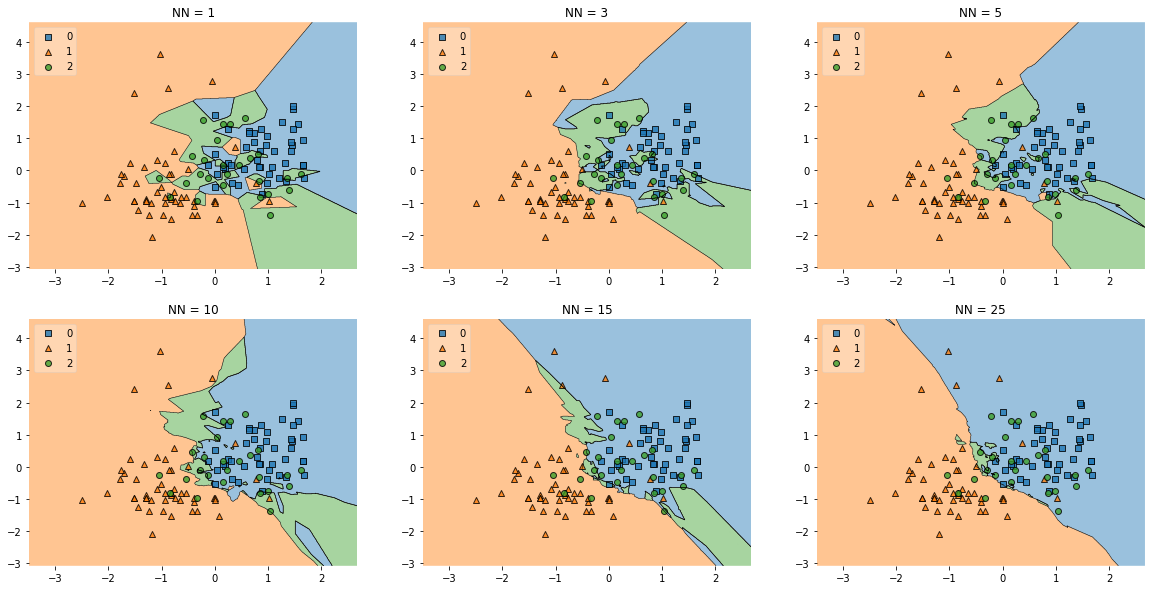

In [9]:
# Initializing Classifiers
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf4 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
clf6 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,10))

labels = ['NN = 1', 'NN = 3', 'NN = 5', 'NN = 10', 'NN = 15', 'NN = 25']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X_train[['alcohol', 'magnesium']], y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[['alcohol', 'magnesium']].to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Нагляднее всего лучший выбор количества соседей демонстрирует зеленая область. При слишком большом количестве соседей зеленые элементы, находящиеся где-то посередине между красными и синими, начинают относится к этим областям, так как количество элементов типа 2 гораздо меньше чем типа 1 и типа 0 и чтобы набрать необходимое число в 10 15 или 25 соседей, по факту нужны все точки класса 2. Но поскольку часть из них все-таки раскидана, то даже при попадании в окружение сплошь зеленых точек, значение будет отдано к более распространенным синему и красному классам. Таким образом, модели с большим числом соседей - 10, 15, 25 на данной выборке недообучивают модель и слишком сильно ограничивают наименее распространенный класс, притом выбросы очень сильно искажают значение и у нас появляются области, которые окружены, например красными значениями (при к=10), но прям рядом оказывается случайная зеленая область, при попадании в которую, конечно, будет дано неправильное предсказание. При слишком маленьком к модель наоборот - переобучается, как например при к = 1, когда для каждой точки создается своя область. Эта модель опять очень чувствительна к выбросам, но уже для каждого она создает свою область, что, конечно, не отражает реального положения дел. 

Модели с числом соседей 3 и 5 выдают наиболее правдоподобные решающие поверхности - лучше всего показывают, в каких областях сосредоточены какие категории, но модель с тремя соседями также может считаться переобученной, так как наличие хотя бы двух выбросов вместе сможет запутать ее и заставит создать дополнительную область там где она не нужна. Модель с 5 соседями оптимальнее всего подбирает области, несмотря на разреженность объектов класса 2, а также имеет лучшую долю правильных ответов на тестовой выборке. Я считаю, именно эту модель можно считать лучшей для обучения классификатора.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

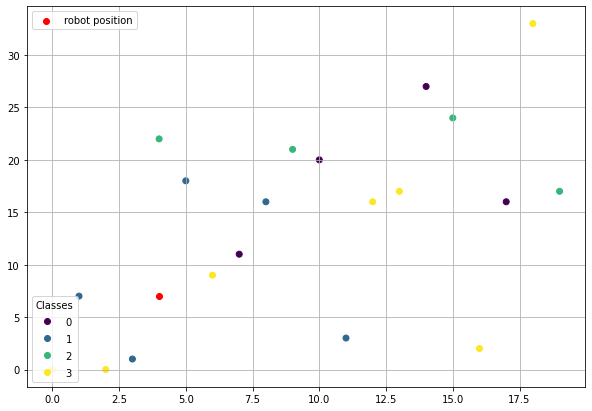

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors = k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        #https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
        pos = self.trajectory[-1]
        if np.random.binomial(1, 0.8, 1)[0] == 1:
            n_pos = self.mapping[self.knn.predict([pos])[0]] + pos
        else:
            n_pos = self.mapping[0] + pos
        self.trajectory.append(n_pos)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [13]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj= np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

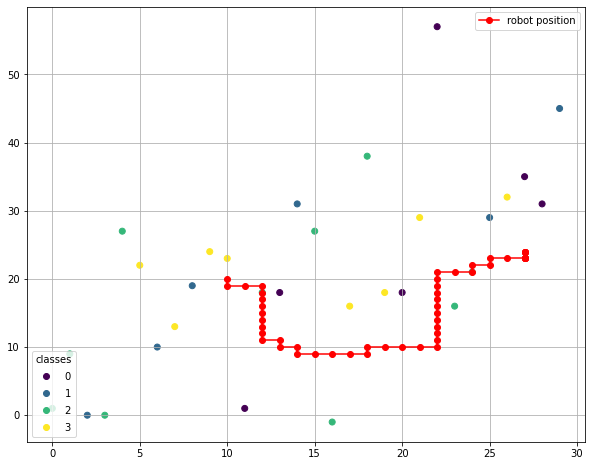

In [14]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

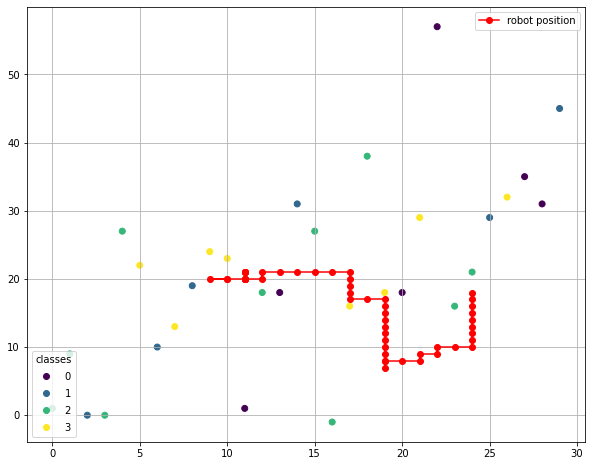

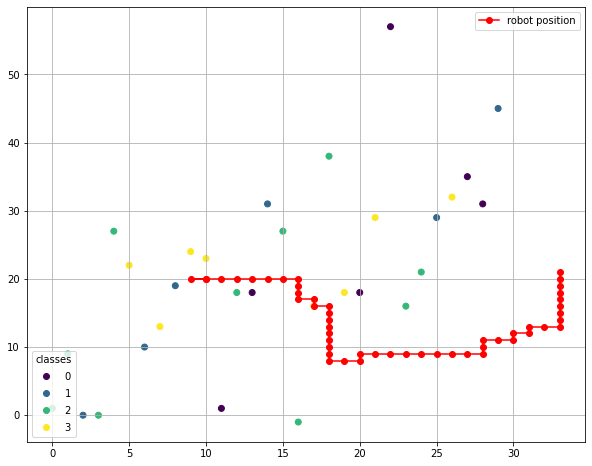

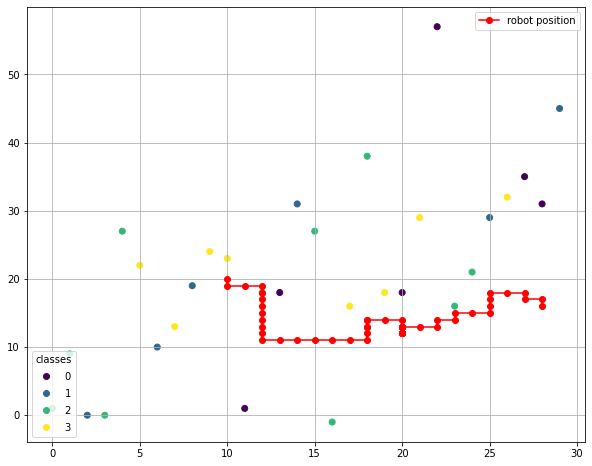

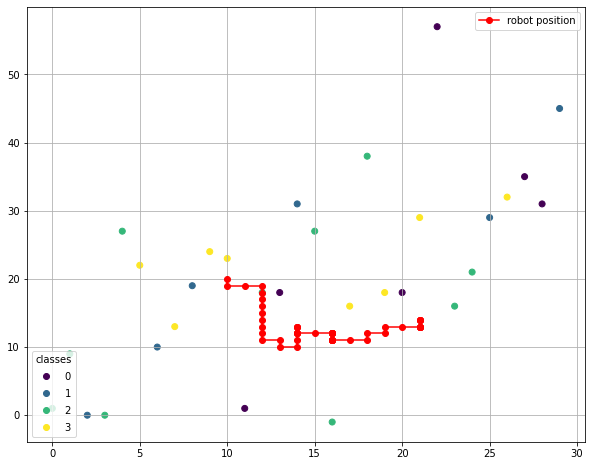

In [15]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

Число соседей непосредственно влияет, куда пойдет робот с вероятностью 0.8, поэтому для большего числа соседей мы можем заметить, что робот поворачивает перед точкой класса 0, хотя класс 0 как раз говорит двигаться вправо. И наоборот, при маленьком значении к робот повинуется этому классу (фиолетовая точка) и проходит рядом с ней направо, так как малое количество соседей заставляет его идти согласно именно этой точке, причем при к=1 робот повинуется каждой ближайшей точке, из-за чего его движение становится менее прямолинейным и более хаотичным. Для больших к тоже наблюдается некоторая хаотичность, поскольку классы определены случайно и буквально с каждым движением происходит смена направляющего класса.

Если бы мы определяли классы не случайно, а осмысленно, мы бы могли направлять нашего робота двигаться именно туда, куда нам нужно, выбрав нужное количество соседей и расположив классы так, чтобы для каждого необходимого для нас перемещения в этой точке присутсвовало необходимое для этого перемещения число соседей.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [16]:
data = pd.read_csv("C:/Users/ilysh/IAD/homeworks/diamonds.txt")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [17]:
if data.isnull().any().any() == False:
    print("Пропущенных значений нет")
else:
    print("Пропущенные значения есть. Удаляем!")

Пропущенных значений нет


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [18]:
data.drop(['Unnamed: 0'], inplace=True, axis=1) #порядковый номер не сообщает нам никакой дополнительной информации о бриллиантах, поэтому можем смело удалять его
#


In [19]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

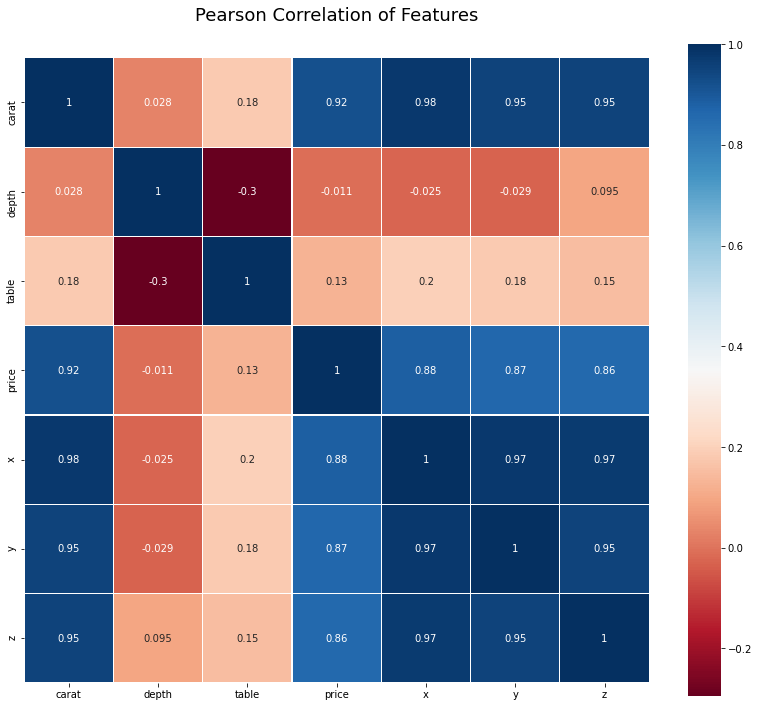

In [20]:
import seaborn as sns
NumericData = data.select_dtypes(include=[np.number])
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#построим корреляционную матрицу чтобы посмотреть зависимость между переменными

С нашей целевой переменной - ценой (4 столбец в матрице) больше всего коррелирует, конечно, признак carat, поскольку вес бриллианта является его основной характеристикой из-за чего корреляция равна 0.92, что очень близко к 1. Также довольно сильно коррелируют признаки x, y и z - длина, ширина и высота бриллианта - чем бриллиант больше, тем выше должна быть его цена. И наконец, слабую корреляцию показывают признаки depth и table, поскольку, если изучить науку подбора и оценки бриллиантов более подробно, то становится понятно, что зависимость между ценой и этими признаками нелинейная, так как существуют некоторые законы, по которым некоторые пропорции более приятны глазу или удобнее для обработки чем другие.   

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
hot = data.iloc[:,1:4]
hot = pd.get_dummies(hot)
data.drop(['cut', 'color', 'clarity'], inplace=True, axis = 1)

In [22]:
y = data['price']
data.drop(['price'], inplace=True, axis=1)
X=data

In [23]:
X = pd.concat((X, hot), axis=1)

In [24]:
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [26]:
scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns)

In [27]:
X_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.551161,-0.877055,-0.205037,0.798862,0.746942,0.646307,-0.175323,-0.31549,1.223813,-0.588096,...,-0.336376,-0.233234,-0.117361,-0.184732,-0.565341,-0.454528,-0.421884,1.837587,-0.269462,-0.319684
1,-0.843309,0.316493,-1.100283,-0.877887,-0.839477,-0.818309,-0.175323,-0.31549,1.223813,-0.588096,...,-0.336376,-0.233234,-0.117361,-0.184732,-0.565341,-0.454528,-0.421884,-0.544192,-0.269462,3.128085
2,-0.822180,-2.070604,2.033079,-0.770861,-0.770125,-0.959138,-0.175323,-0.31549,-0.817118,1.700404,...,-0.336376,-0.233234,-0.117361,-0.184732,1.768845,-0.454528,-0.421884,-0.544192,-0.269462,-0.319684
3,-1.054592,0.737746,-0.205037,-1.288156,-1.290263,-1.212629,-0.175323,-0.31549,1.223813,-0.588096,...,-0.336376,-0.233234,-0.117361,-0.184732,-0.565341,-0.454528,2.370317,-0.544192,-0.269462,-0.319684
4,0.614546,-0.245176,-0.652660,0.781024,0.781618,0.744887,-0.175323,-0.31549,1.223813,-0.588096,...,-0.336376,-0.233234,-0.117361,-0.184732,1.768845,-0.454528,-0.421884,-0.544192,-0.269462,-0.319684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-0.948950,-0.315385,-1.547906,-1.047346,-1.064870,-1.071801,-0.175323,-0.31549,1.223813,-0.588096,...,2.972867,-0.233234,-0.117361,-0.184732,1.768845,-0.454528,-0.421884,-0.544192,-0.269462,-0.319684
37754,0.445520,0.456911,1.585456,0.540215,0.556225,0.604059,-0.175323,3.16967,-0.817118,-0.588096,...,-0.336376,-0.233234,-0.117361,-0.184732,-0.565341,-0.454528,-0.421884,-0.544192,-0.269462,3.128085
37755,-1.054592,0.246285,-1.100283,-1.279237,-1.220911,-1.212629,-0.175323,-0.31549,1.223813,-0.588096,...,-0.336376,-0.233234,-0.117361,-0.184732,-0.565341,-0.454528,-0.421884,1.837587,-0.269462,-0.319684
37756,0.424391,0.807955,-0.205037,0.558052,0.504211,0.632224,-0.175323,-0.31549,1.223813,-0.588096,...,-0.336376,-0.233234,-0.117361,-0.184732,-0.565341,-0.454528,2.370317,-0.544192,-0.269462,-0.319684


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
reg = LinearRegression().fit(X_train, y_train)
y_predict_train = reg.predict(X_train)
y_predict_test = reg.predict(X_test)
mse_train = mse(y_train, y_predict_train)
mse_test = mse(y_test, y_predict_test)
print(mse_train, mse_test)

1270826.306384273 1.603094182193658e+27


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [29]:
reg.coef_

array([ 5.31253398e+03, -9.05782967e+01, -6.49358530e+01, -1.09202061e+03,
       -1.83020312e+00, -3.73388794e+01,  6.22588441e+14,  1.05023797e+15,
        1.79342059e+15,  1.59940959e+15,  1.52192634e+15, -1.07277130e+15,
       -1.25216886e+15, -1.22991867e+15, -1.31492183e+15, -1.17038199e+15,
       -9.78238044e+14, -7.16078738e+14,  1.37495739e+14,  2.12164833e+14,
        5.08826966e+14,  4.47408707e+14,  4.25362043e+14,  4.98659575e+14,
        2.98373783e+14,  3.44482597e+14])

Оценки коэффициентов для карата бриллианта и для его координаты х в 100 и более раз превыашют по модулю оценки для остальных вещественных переменных. С одной стороны это логично - ценность бриллианта измеряется в первую очередь его массой и размером, причем, видимо координата х является наиболее предпочтительной в плане оценки стоимости бриллианта, но для работы с данными это может создать проблемы, причем большие веса могут быть следствием не только сильной зависимости расчитываемой переменной и признака, но и мультиколлинеарности, с которой будем работать и избавляться от нее в следующих заданиях. 

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [30]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=10)
las.fit(X_train, y_train)
y_predict_train = las.predict(X_train)
y_predict_test = las.predict(X_test)
mse_train = mse(y_train, y_predict_train)
mse_test = mse(y_test, y_predict_test)
print(mse_train, mse_test)

1281658.5850947248 1303372.6360104354


In [31]:
las.coef_

array([4863.67766803,  -60.41416041,  -49.29786512, -658.09972633,
         -0.        ,  -48.45277491, -127.83128798,  -39.04684649,
         43.88786159,    0.        ,   -0.        ,  149.11043521,
         89.85613427,   67.88930246,   -0.        , -164.0162399 ,
       -286.61249227, -399.48610442, -487.6291459 ,  180.01223705,
       -259.80002388, -579.87819569,   97.98971952,   -0.        ,
        188.83867481,  195.13698841])

In [32]:
from sklearn.linear_model import Ridge
rid = linear_model.Ridge(alpha=10)
rid.fit(X_train, y_train)
y_predict_train = rid.predict(X_train)
y_predict_test = rid.predict(X_test)
mse_train = mse(y_train, y_predict_train)
mse_test = mse(y_test, y_predict_test)
print(mse_train, mse_test)

1270852.7041606954 1292321.7390723573


In [33]:
rid.coef_

array([ 5.27234780e+03, -8.85388490e+01, -6.27417577e+01, -1.04917778e+03,
       -2.08160845e+00, -4.40887329e+01, -1.27901934e+02, -3.83568281e+01,
        5.26353496e+01,  1.62069508e+01, -2.65984148e-01,  2.12078595e+02,
        1.59676031e+02,  1.37040417e+02,  5.54818119e+01, -1.21506165e+02,
       -2.57877967e+02, -3.83311665e+02, -4.70331727e+02,  2.33097820e+02,
       -1.50187254e+02, -4.92967715e+02,  2.02741863e+02,  1.06896132e+02,
        2.58997461e+02,  2.76847935e+02])

Веса уменьшились гораздо сильнее для Лассо-регресси, Ридж-регрессия же практически не изменила изначальных весов, особенно их порядок, который вызывает наибольшие вопросы и неудобства. Поскольку Лассо-регрессия сильно изменила веса, значит проблема мультиколлениарности была довольно таки сильной в изначальных данных (что и логично: масса бриллианта зависит от его размеров и плотности, плотность в свою очередь связана с прозрачностью, а глубина по двум плоскостям зависит от координат)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [34]:
a = [0.1, 1, 10, 100, 200]
las_list = list()
rid_list = list()
a_list = list()
for i in range(5):
    las = linear_model.Lasso(alpha=a[i])
    las.fit(X_train, y_train)
    rid = linear_model.Ridge(alpha=a[i])
    rid.fit(X_train, y_train)
    a_list.append(a[i])
    las_list.append(np.linalg.norm(las.coef_))
    rid_list.append(np.linalg.norm(rid.coef_))

C:\Users\ilysh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251036045.1135788, tolerance: 59994964.75271189
  model = cd_fast.enet_coordinate_descent(


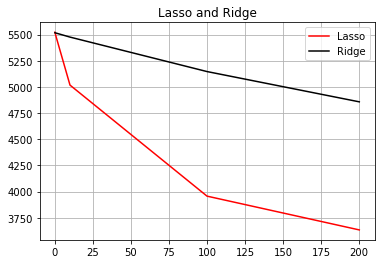

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
x = a_list
y1 = las_list
y2 = rid_list
plt.title("Lasso and Ridge")
plt.grid()
plt.plot(x,y1, color='red')
plt.plot(x,y2, color='black')
plt.legend(('Lasso', 'Ridge'))

Гораздо сильнее уменьшает веса метод L1 регуляции - Lasso регрессия, тогда как Ridge регрессия довольно-таки слабо изменяет евклидову норму весов. Лассо-регрессию часто используют для отбора параметров, так как она помогает выявить не несущие информации параметры, и, если после Лассо-регрессии какие-то коэффициенты занулятся, значит нам не стоит использовать их в нашей модели.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [36]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv = 5).fit(X_train, y_train) 
mse_cv = lcv.mse_path_.mean(axis=1)
answer = pd.DataFrame(data = {'Alphas': lcv.alphas_, 'mse': mse_cv})
answer

C:\Users\ilysh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2579702353.6296844, tolerance: 47919147.9701415
  model = cd_fast.enet_coordinate_descent_gram(


,Alphas,mse
0,200.0,1.946057e+06
1,100.0,1.526716e+06
2,10.0,1.286078e+06
3,1.0,1.275875e+06
4,0.1,1.286781e+06


Наибольшее качество дает модель с а=1, так как для нее среднеквадратичная ошибка получается наименьшей

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [41]:
las1 = linear_model.Lasso(alpha=1)
las1.fit(X_train, y_train)
coefs = pd.DataFrame(data = {"coefs": las1.coef_, "params": X_train.columns})
coefs

,coefs,params
0,5263.786963,carat
1,-87.865908,depth
2,-61.660024,table
3,-1046.601590,x
4,-0.000000,y
5,-41.078339,z
6,-133.455330,cut_Fair
7,-47.895832,cut_Good
8,35.461069,cut_Ideal
9,0.000000,cut_Premium


Наиболее информативным оказался, как и ожидалось, признак карата бриллианта - чем больше вес, тем ценнее бриллиант, также довольно таки информативным оказался признак координаты х, четкой логики здесь нет, но возможно именно наименее растянутые по оси х камни ценятся больше всего. Абсолютно неинформативными оказались признаки у, так как он учитывается в depth и table, поэтому при избавлении от мультиколлинеарности мы его потеряли, а также cut_premium, так как премиальность обрезки скорее всего учитывается также в других критериях камня и опять есть свойство мультиколлинеарности, color_G, clarity_VS2 - менее объяснимая неинформативность, но возможно также сильно коррелируют с другими признаками.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [38]:
y_predict_train = las1.predict(X_train)
y_predict_test = las1.predict(X_test)
mse_tr = mse(y_train, y_predict_train)
mse_ts = mse(y_test, y_predict_test)
print(mse_tr, mse_ts)

1270897.7794685857 1292317.5450238925


Для тренировочной выборки среднеквадратичная ошибка при использовании Лассо-регрессии чуть-чуть выросла, тогда как на тестовой выборке она сократилась в несколько раз, что еще раз подтверждает мультиколлинеарность наших данных, из-за чего для предсказаний лучше всего использовать Лассо-регрессию. Наши данные сильно взаимосвязаны - table и depth зависят от координат бриллианта, так как они показывают его размер в двух измерениях. Из-за этого обычная линейная регрессия несмотря на такой же показатель на обучающей выборке на тестовой ведет себя неадекватно и не замечает взаимозависимости переменных. При Лассо-регресии алгоритму уже не важна это взаимосвязь, поэтому он работает гораздо более логично и адекватно.